Oct-2 is also known for Gandhi Jayanti. so a lots of tweets are coming all days. I try to grab most of them <br>
and do some basic analysis . A single tweet data is looks like http://pastebin.com/dSW9vXvS which can be viewd ( prettify) with <br>
various json viewer. I grabed 22,000 tweets and stored into a json file. so lets start

In [394]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as md
style.use("fivethirtyeight")

from collections import Counter
from datetime import datetime

plt.rcParams['figure.figsize'] = (14.0, 8.0)



In [438]:
#getting data 
with open(r'D:\Devotion of time\Data\oct2.json','r') as f:
    tweet_data = []
    for line in f:
        if line.strip() != '':
            try:
                tweet_data.append(json.loads(line))
            except ValueError:
                pass
            
    

In [437]:
#len(tweet_data)

In [402]:
#s=tweet_data[1]['source']
#print s


In [413]:
tweet_text=[]
tweet_source=[]
tweet_created_at=[]
tweet_utc_offset=[]
tweet_timezone=[]
hashtag_used=[]
user_mentioned=[]
account_created=[]
timestamp=[]
for tweet in tweet_data:
    try:
        tweet_text.append(tweet['text'])
    except KeyError:
        pass
    try:
        tweet_source.append(tweet['source'])
    except KeyError:
        pass
    try:
        tweet_created_at.append(tweet['created_at'])
    except KeyError:
        pass
    try:
        timestamp.append(tweet['timestamp_ms'])
    except KeyError:
        pass
    try :                 
        tweet_utc_offset.append(tweet['user']['utc_offset'])
    except KeyError:
        pass
    try:
        tweet_timezone.append(tweet['user']['time_zone'])
    except KeyError:
        pass
    try:
        account_created.append(tweet['user']['created_at'])
    except KeyError:
        pass
    
    try: 
        hashtag_used.append(tweet['entities']['hashtags'])
    except KeyError:
        pass
    try: 
        user_mentioned.append(tweet['entities']['user_mentions'])
    except KeyError:
        pass

In [384]:
#print hashtag_used
#print len(hashtag_used[5])
#print hashtag_used[5][0]['text']


In [435]:
def hashtag_trend(hashtag_used):
    hashtag =[]
    for entries in hashtag_used:
        if len(entries) == 0:
            hashtag.append('None')
        else:
            for single_entry in entries:
                hashtag.append(single_entry['text'])

    most_used_hashtag = Counter(hashtag)       
    most_hashtag= most_used_hashtag.most_common()

    #Now plotting mostly used hashtag while tweeting on Gandhi Jayanti 
    hashtag_used_with_counter=[]
    hashtag_counter=[]
    non_counter_list=['GandhiJayanti','MahatmaGandhi','Gandhi','mahatmagandhi','mahatma','HappyGandhiJayanti','gandhijayanti',
                      'gandhi','Gandhijayanti']
    for hashtag in most_hashtag:
        if hashtag[0] in non_counter_list:
            pass
        else:
            hashtag_used_with_counter.append(hashtag[0])
            hashtag_counter.append(hashtag[1])

    fig, ax = plt.subplots(1,1, figsize=(10,7.5))

    x_size=[i for i in hashtag_counter[:20]]
    #print len(x_size)
    y_label=[]
    for i in hashtag_used_with_counter[:20]:
        try:
            y_label.append(str(i))
        except UnicodeEncodeError:
            y_label.append('some random unicode')
    #y_label= [str(i) for i in hashtag_used_with_counter[:20]]
    #print len(y_label)
    y_pos = np.arange(len(y_label))

    plt.barh(y_pos, x_size, align='center', alpha=0.8)
    plt.yticks(y_pos, y_label)
    plt.xlabel('No of time #tag used ')
    plt.ylabel('Hashtag used')
    plt.title('No of time other hashtag used while tweeting about Gandhi Jaynti')
    plt.show()


#Let's figure out  which twitter client is used for tweeting (dealing with source )

def client_var(tweet_source):
    android=0
    web=0
    ipad=0
    iphone=0
    hootsuite=0
    mobile_web=0
    face_insta_twitter=0
    windows=0
    others=0
    for source in tweet_source:
        if "Android" in source:
            android= android +1
        elif "Web Client" in source:
            web= web +1
        elif "iPad" in source:
            ipad= ipad +1
        elif "iPhone" in source:
            iphone = iphone + 1
        elif "Mobile Web" in source:
            mobile_web= mobile_web+1
        elif "Facebook" in source or "Instagram" in source:
            face_insta_twitter = face_insta_twitter + 1
        elif "Hootsuite" in source or "Solomofy" in source:
            hootsuite = hootsuite + 1
        elif "Windows" in source :
            windows = windows + 1
        else:
            others = others + 1


    # Plotting a pie chart for above 
    labels=['Android','Web','iPhone','Windows Phone','Mobile Web','iPad','Hootsuite','Social','Others']
    label_size=[android, web,iphone,windows,mobile_web,ipad,hootsuite,face_insta_twitter,others]
    colors= ['#d62728', '#ff9896', '#9467bd', '#c5b0d5','#8c564b', 
            '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f']
    explode= []
    for i in label_size:
        if i > (sum(label_size)) /8 :
            explode.append(0.1)
        else:
            explode.append(0.0)
    percent=[]
    for i in label_size:
        perc= 100.0 * i / sum(label_size)
        percent.append(perc)

    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]

    plt.pie(label_size,labels=labels, explode=explode,colors=colors, shadow=True, startangle=90)
    plt.title("What twitter client is used while tweeting")
    plt.show()
    
    
#Checking at which time the user account is created.

def user_account_creation(account_creation_year):
    account_creation_year=[]
    for account_time in account_created:
        account_creation_year.append(int(account_time[-4:]))

    year_counter= Counter(account_creation_year).most_common()   
    # so instead of a counter , year_counter will be a list (with .most_common() method) which will be easy to work with
    #print year_counter
    year=[]
    count=[]
    for year_count in year_counter:
        year.append(year_count[0])
        count.append(year_count[1])

    colors = np.random.rand(len(year))
    area = np.pi * (15 * np.random.rand(len(year)))**2

    plt.scatter(year,count,s=area, c=colors,alpha=0.6)
    plt.xlabel("No of User account created In")
    plt.ylabel("No of Tweets")
    plt.title('No of tweets vs account creation year')
    plt.show()
    #By this scatter graph we can say that mostly tweet are
    #coming from account that are <b> created in 2016 </b> . and the 2007 is the earliest year which gone listed.
    
    
#checking for most active time of user

def tweeting_time(tweet_created_at):
    tweet_creation_datetime=[]
    for every_time in tweet_created_at:
        every_time= every_time[:16] + every_time[25:]
        tweet_creation_datetime.append(datetime.strptime(every_time,'%a %b %d %H:%M %Y'))

    counted_time= Counter(tweet_creation_datetime).most_common()
    tweet_time_count= []
    tweet_timing=[]
    for tweet_time in counted_time:
        tweet_timing.append(tweet_time[0])
        tweet_time_count.append(tweet_time[1])

    plt.subplots_adjust(bottom=0.2)      #for this I found something helpful on stackoverflow :) 
    plt.xticks( rotation=25 )

    ax=plt.gca()
    xfmt = md.DateFormatter('%Y %m %d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)

    plt.plot(tweet_timing, tweet_time_count)
    plt.xlabel('Time')
    plt.ylabel('NO of Tweets')
    plt.title('No of tweets vs Time ')
    plt.show()


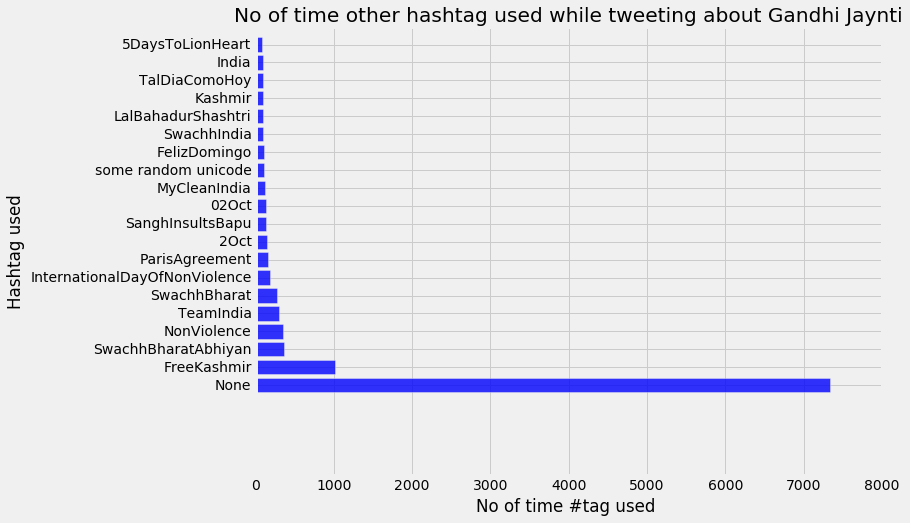

In [431]:
hashtag_trend(hashtag_used)

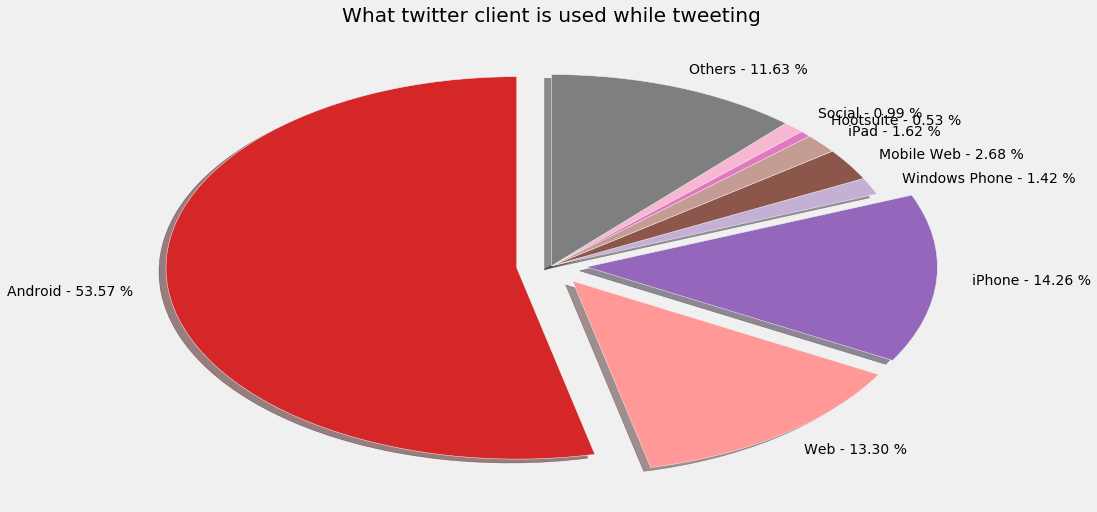

In [436]:
client_var(tweet_source)


<b> From Pie Chart</b> -  <b>half of tweet </b> is done using an Android phone.<br>
after that IPhone user are on the list.<br>
<b>Others </b> include various automated service like Hootsuite , buffer, twitter deck etc



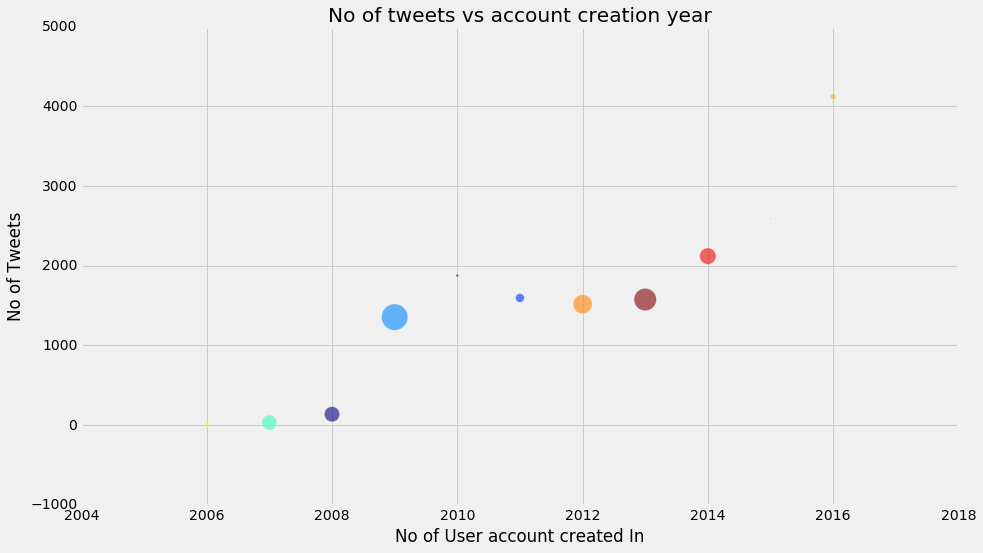

In [433]:
user_account_creation(account_creation_year)


By above scatter graph we can say that mostly tweet are coming from account that are <b> created in 2016 </b> . and the 2007 is the earliest year which gone listed.

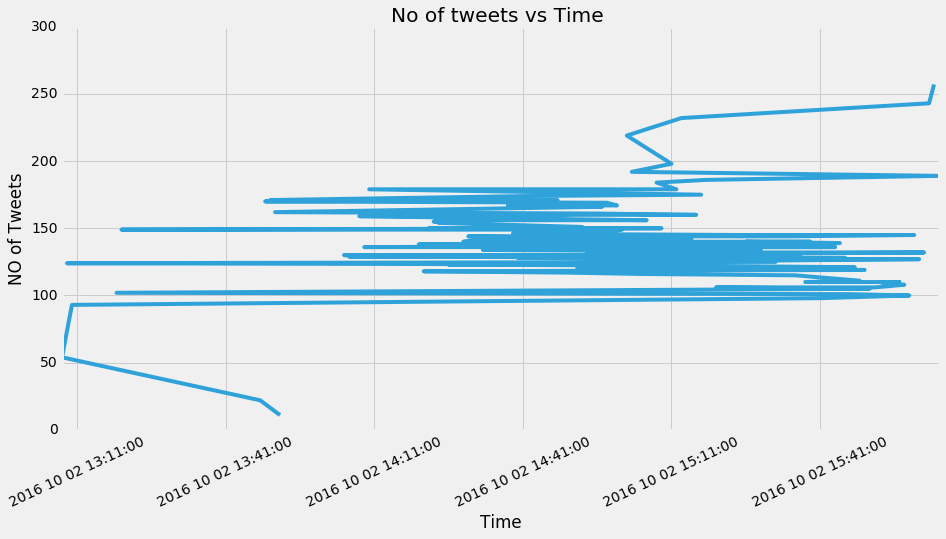

In [434]:
tweeting_time(tweet_created_at)